## Cleaning Data (API Called) 6950 data points

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#read in CSV
df = pd.read_csv('movieDB_API_movies.csv') 

# drop useless column index-like column
df = df.drop(columns='Unnamed: 0') 

## Create Metric Columns
# Create Total Profit Column WITH values containing budget/revenue
df['gross_profit'] = round(df[(df['revenue'] != 0) & (df['budget'] != 0)]['revenue'] -df[(df['revenue'] != 0) & (df['budget'] != 0)]['budget'],2)
# Create ROI column
df['ROI (%)'] = round((df['gross_profit'] / df['budget']) * 100,2)

# there are 2677 with null gross_profit, we want to
df_profits = df[df['gross_profit'].notna()]

# pd.DataFrame(df_profits).to_csv('movieDB_API_movies_w_gross_profits_&_ROI.csv') #Turn into csv file for easy access

In [2]:
df_profits.head() # this is what our data looks like

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit,ROI (%)
0,13200000,"['Comedy', 'Drama', 'Romance']",19404,tt0112870,17.437,1995-10-20,100000000,190.0,Dilwale Dulhania Le Jayenge,8.8,2214,86800000.0,657.58
1,25000000,"['Drama', 'Crime']",278,tt0111161,35.028,1994-09-23,28341469,142.0,The Shawshank Redemption,8.7,15045,3341469.0,13.37
2,6000000,"['Drama', 'Crime']",238,tt0068646,29.433,1972-03-14,245066411,175.0,The Godfather,8.7,11486,239066411.0,3984.44
3,11363000,"['Comedy', 'Thriller', 'Drama']",496243,tt6751668,176.819,2019-05-30,201055038,132.0,Parasite,8.6,4751,189692038.0,1669.38
4,22000000,"['Drama', 'History', 'War']",424,tt0108052,19.641,1993-11-30,321365567,195.0,Schindler's List,8.6,9163,299365567.0,1360.75


In [3]:
df_profits.info() # 6950 no missing data apparently, 4273/6950 have gross_profit (61% of data can use profit metric)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4273 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4273 non-null   int64  
 1   genres        4273 non-null   object 
 2   id            4273 non-null   int64  
 3   imdb_id       4273 non-null   object 
 4   popularity    4273 non-null   float64
 5   release_date  4273 non-null   object 
 6   revenue       4273 non-null   int64  
 7   runtime       4271 non-null   float64
 8   title         4273 non-null   object 
 9   vote_average  4273 non-null   float64
 10  vote_count    4273 non-null   int64  
 11  gross_profit  4273 non-null   float64
 12  ROI (%)       4273 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 467.4+ KB


## What are the genres?

In [4]:
#showing first ten genres
df_profits['genres'].value_counts()[0:10] #we should keep the combinations... They're important

### MY ANALYSIS
# What genres do we have?
## 1625 unique combinations of genres

# Top 3 Genres?
## Comedy 552/1625 or 34%
## Drama 419/1625 or 26%
## (Drama + Romance) 195/1625 or 12%

['Comedy']                        237
['Drama']                         234
['Drama', 'Romance']              114
['Comedy', 'Romance']             106
['Horror', 'Thriller']             91
['Comedy', 'Drama']                85
['Comedy', 'Drama', 'Romance']     79
['Horror']                         69
['Drama', 'Thriller']              52
['Action', 'Thriller']             45
Name: genres, dtype: int64

In [5]:
genre_count_list = []
pd.DataFrame(df['genres']).iloc[0]
# so far each entry is made up of strings

df['genres'].value_counts() # maybe we can see for each genres 

['Comedy']                                                     552
['Drama']                                                      419
['Drama', 'Romance']                                           195
['Comedy', 'Romance']                                          176
['Comedy', 'Drama']                                            173
                                                              ... 
['Action', 'Comedy', 'Drama', 'Fantasy', 'Thriller']             1
['Horror', 'Fantasy', 'Drama', 'Action', 'Science Fiction']      1
['Western', 'Comedy']                                            1
['Comedy', 'Family', 'Science Fiction', 'Fantasy']               1
['Fantasy', 'Action', 'Adventure', 'Family', 'Comedy']           1
Name: genres, Length: 1625, dtype: int64

In [6]:
# each movie you have has a profit_margin (ROI)
# you have 1 movie with a list of genres ['Action, Adventure','Fantasy'a]
# 657
df_profits.head()

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit,ROI (%)
0,13200000,"['Comedy', 'Drama', 'Romance']",19404,tt0112870,17.437,1995-10-20,100000000,190.0,Dilwale Dulhania Le Jayenge,8.8,2214,86800000.0,657.58
1,25000000,"['Drama', 'Crime']",278,tt0111161,35.028,1994-09-23,28341469,142.0,The Shawshank Redemption,8.7,15045,3341469.0,13.37
2,6000000,"['Drama', 'Crime']",238,tt0068646,29.433,1972-03-14,245066411,175.0,The Godfather,8.7,11486,239066411.0,3984.44
3,11363000,"['Comedy', 'Thriller', 'Drama']",496243,tt6751668,176.819,2019-05-30,201055038,132.0,Parasite,8.6,4751,189692038.0,1669.38
4,22000000,"['Drama', 'History', 'War']",424,tt0108052,19.641,1993-11-30,321365567,195.0,Schindler's List,8.6,9163,299365567.0,1360.75


## Preprocess Data to Calculate Average Weighted Budget for Each Genre

In [7]:
import ast #one example
from tqdm import tqdm # progress bar

#Fix data type of Genre Column
df['genres'][0]
res = ast.literal_eval(df['genres'][0]) 

df_profits = df_profits.reset_index(drop=True)

res_list = [] #loop through
for i in df_profits['genres']:
    res = ast.literal_eval(i)
    res_list.append(res)

df_profits['genres'] = res_list
df_profits['genres']

0                                [Comedy, Drama, Romance]
1                                          [Drama, Crime]
2                                          [Drama, Crime]
3                               [Comedy, Thriller, Drama]
4                                   [Drama, History, War]
                              ...                        
4268                  [Action, Fantasy, Horror, Thriller]
4269                                     [Action, Comedy]
4270                       [Action, Science Fiction, War]
4271                           [Horror, Action, Thriller]
4272    [Action, Adventure, Fantasy, Science Fiction, ...
Name: genres, Length: 4273, dtype: object

In [8]:
# count of all genres
genre_and_count ={}
for genres in df_profits.genres:
    for genre in genres:
        genre_and_count[genre] = genre_and_count.get(genre, 1) + 1 

In [9]:
print(sum(genre_and_count.values()))
genre_and_count

11493


{'Comedy': 1480,
 'Drama': 1877,
 'Romance': 698,
 'Crime': 701,
 'Thriller': 1282,
 'History': 193,
 'War': 147,
 'Animation': 286,
 'Family': 503,
 'Fantasy': 517,
 'Action': 1196,
 'Adventure': 900,
 'Horror': 547,
 'Western': 63,
 'Science Fiction': 595,
 'Music': 106,
 'Mystery': 400,
 'TV Movie': 2}

In [10]:
genre_and_count.keys()

dict_keys(['Comedy', 'Drama', 'Romance', 'Crime', 'Thriller', 'History', 'War', 'Animation', 'Family', 'Fantasy', 'Action', 'Adventure', 'Horror', 'Western', 'Science Fiction', 'Music', 'Mystery', 'TV Movie'])

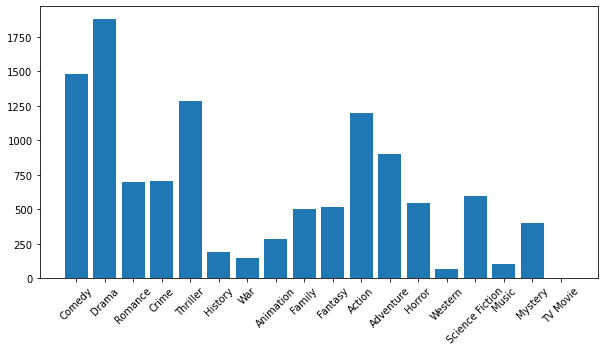

In [11]:
# graph of the number of genres
fig, ax = plt.subplots(figsize=(10,5))
plt.xticks(rotation=45)
plt.bar(genre_and_count.keys(), genre_and_count.values());

## Calculate Average Weighted Budget for Each Genre

In [12]:
# get number of genres per row and divide it by the budget
df_profits['qty_of_genres'] = df_profits['genres'].map(lambda x: len(x)) # get len of each genre and create column
df_profits['weighted_budget']  = round(df_profits['budget'] / df_profits['qty_of_genres'],2) #divide budget/genre qty for weights

In [13]:
#sum the weighted budget for each genre to average it by the number of individual genres in next cell
genre_wbudget ={} 
for index in df_profits.index:
    for genre in df_profits['genres'][index]:
        budget = df_profits['weighted_budget'][index] 
        genre_wbudget[genre] = genre_wbudget.get(genre,0) + budget
genre_wbudget

{'Comedy': 22110244977.059982,
 'Drama': 21582787850.83,
 'Romance': 7335526459.839999,
 'Crime': 7571728193.84,
 'Thriller': 15334472643.820002,
 'History': 2506955968.609999,
 'War': 1780655075.23,
 'Animation': 5656756198.65,
 'Family': 9817419606.749998,
 'Fantasy': 10801039632.24,
 'Action': 24153247089.410004,
 'Adventure': 20642300959.53,
 'Horror': 4046237816.4299994,
 'Western': 768518730.49,
 'Science Fiction': 12089632379.579998,
 'Music': 893114061.4799999,
 'Mystery': 3848972922.3900003,
 'TV Movie': 2333333.33}

In [14]:
# get average of the weighted budget by genre count
genre_and_weight_budget = {}
for genre, budget in genre_wbudget.items():
    genre_and_weight_budget.update({genre:budget / genre_and_count[genre]})
genre_and_weight_budget 

{'Comedy': 14939354.714229718,
 'Drama': 11498555.061710177,
 'Romance': 10509350.228997134,
 'Crime': 10801324.099629102,
 'Thriller': 11961367.116864275,
 'History': 12989409.163782379,
 'War': 12113299.831496598,
 'Animation': 19778867.827447552,
 'Family': 19517732.816600394,
 'Fantasy': 20891759.443404254,
 'Action': 20195022.650008366,
 'Adventure': 22935889.955033332,
 'Horror': 7397144.088537476,
 'Western': 12198710.007777778,
 'Science Fiction': 20318709.881647054,
 'Music': 8425604.353584904,
 'Mystery': 9622432.305975001,
 'TV Movie': 1166666.665}

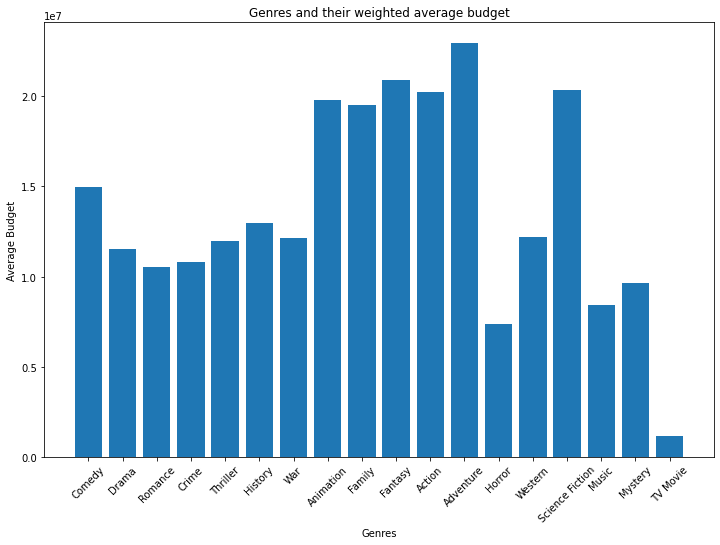

In [15]:
plt.figure(figsize=(12,8));
plt.bar(genre_and_weight_budget.keys(),genre_and_weight_budget.values());
plt.title('Genres and their weighted average budget');
plt.xlabel('Genres');
plt.ylabel('Average Budget');
plt.xticks(rotation=45)
plt.show()

## Calculate Average Weighted ROI for Each Genre

In [16]:
def reject_outliers(data, m=2):
    return data[abs(data['ROI (%)'] - np.mean(data['ROI (%)'])) < m * np.std(data['ROI (%)'])]

df_profits = reject_outliers(df_profits, m=2)
df_profits[df_profits['title'] == 'Paranormal Activity']

,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit,ROI (%),qty_of_genres,weighted_budget


In [17]:
df_profits['weighted_ROI']  = round(df_profits['ROI (%)'] / df_profits['qty_of_genres'],2) #divide budget/genre qty for weights
# sum the weight
# sum the weight / qty

In [18]:
# trying to link genre to the ROI
genre_roi_sum = {}
for index in df_profits.index:
    for genre in df_profits['genres'][index]:
        roi = df_profits['weighted_ROI'][index] 
        genre_roi_sum[genre] = genre_roi_sum.get(genre,0) + roi    
genre_roi_sum

{'Comedy': 291352.6400000003,
 'Drama': 338942.69999999925,
 'Romance': 109076.81000000007,
 'Crime': 71423.08000000007,
 'Thriller': 170096.76,
 'History': 18970.109999999997,
 'War': 18500.899999999987,
 'Animation': 56267.310000000056,
 'Family': 73310.18000000008,
 'Fantasy': 53669.08000000004,
 'Action': 118984.74000000018,
 'Adventure': 98867.52000000014,
 'Horror': 273084.0800000001,
 'Western': 21461.239999999998,
 'Science Fiction': 65997.28000000006,
 'Music': 19758.770000000008,
 'Mystery': 44336.78999999998,
 'TV Movie': 9.05}

In [19]:
unique_genres = list(genre_roi_sum.keys())
unique_genres

['Comedy',
 'Drama',
 'Romance',
 'Crime',
 'Thriller',
 'History',
 'War',
 'Animation',
 'Family',
 'Fantasy',
 'Action',
 'Adventure',
 'Horror',
 'Western',
 'Science Fiction',
 'Music',
 'Mystery',
 'TV Movie']

In [20]:
genre_weighted_roi = {}
for genre, roi in genre_roi_sum.items():
    genre_weighted_roi.update({genre: roi / genre_and_count[genre]})
genre_weighted_roi

{'Comedy': 196.8598918918921,
 'Drama': 180.57682472029796,
 'Romance': 156.27050143266484,
 'Crime': 101.8874179743225,
 'Thriller': 132.68078003120127,
 'History': 98.29072538860102,
 'War': 125.85646258503392,
 'Animation': 196.73884615384634,
 'Family': 145.74588469184906,
 'Fantasy': 103.80866537717608,
 'Action': 99.48556856187307,
 'Adventure': 109.85280000000014,
 'Horror': 499.23963436928716,
 'Western': 340.65460317460315,
 'Science Fiction': 110.91979831932782,
 'Music': 186.40349056603782,
 'Mystery': 110.84197499999995,
 'TV Movie': 4.525}

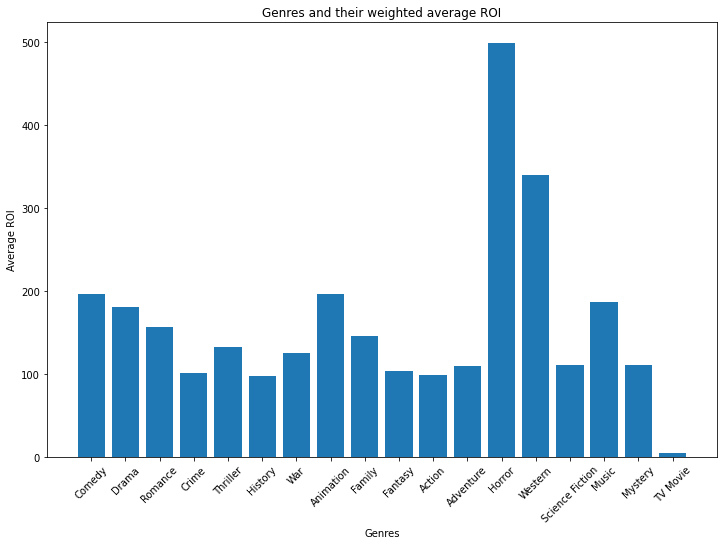

In [21]:
plt.figure(figsize=(12,8));
plt.bar(genre_weighted_roi.keys(),genre_weighted_roi.values());
plt.title('Genres and their weighted average ROI');
plt.xlabel('Genres');
plt.ylabel('Average ROI');
plt.xticks(rotation=45)
plt.show()

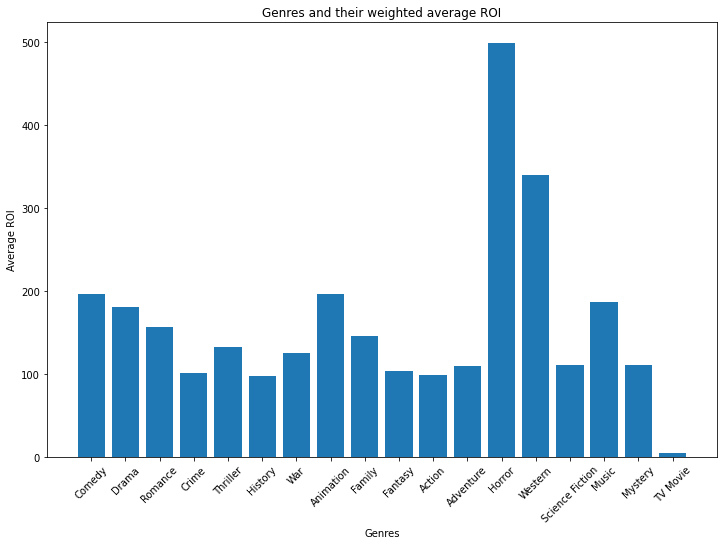

In [22]:
plt.figure(figsize=(12,8));
plt.bar(genre_weighted_roi.keys(),genre_weighted_roi.values());
plt.title('Genres and their weighted average ROI');
plt.xlabel('Genres');
plt.ylabel('Average ROI');
plt.xticks(rotation=45)
plt.show()

In [23]:
#we should turn the years into most recent so that we can give examples of excellent ROI
df_profits[df_profits['genres'].map(lambda x: 'Horror' in x)]['release_date']

16      1960-06-22
41      1991-02-01
69      1980-05-22
110     1979-05-25
147     1982-06-25
           ...    
4256    2018-08-10
4258    2005-10-22
4261    1994-01-01
4268    2005-01-28
4271    2003-04-11
Name: release_date, Length: 543, dtype: object

In [25]:
import datetime

In [26]:
df_profits['release_date'] = pd.to_datetime(df_profits['release_date'])

In [27]:
df_profits['release_year'] = df_profits['release_date'].map(lambda x: x.year)

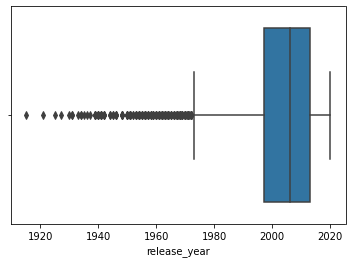

In [28]:
sns.boxplot(df_profits['release_year'])

In [36]:
# add all of our new columns to a final csv
# pd.DataFrame(df_profits).to_csv('final_data.csv')

In [30]:
horror_df = df_profits[df_profits['genres'].map(lambda x: 'Horror' in x)].groupby('release_year').mean().reset_index()
horror_df[(horror_df['release_year'] >= 2010) & (horror_df['release_year'] <= 2020)].reset_index()[['release_year','weighted_budget','weighted_ROI']]

,release_year,weighted_budget,weighted_ROI
0,2010,5.436508e+06,416.572381
1,2011,7.565490e+06,206.916818
2,2012,7.594444e+06,521.085556
3,2013,9.357778e+06,339.509333
4,2014,4.249667e+06,873.605217
5,2015,5.504412e+06,368.082353
6,2016,4.236988e+06,158.285185
7,2017,1.003826e+07,346.065000
8,2018,7.259058e+06,281.626522
9,2019,9.388021e+06,221.756875


In [31]:
def genre_year(df, genre):
    genre_df = df[df['genres'].map(lambda x: genre in x)].groupby('release_year').mean().reset_index()
    a = genre_df[(genre_df['release_year'] >= 2010) & (genre_df['release_year'] <= 2019)].reset_index()[['release_year','weighted_budget','weighted_ROI']]
    list_of_genres =[]
    for i in range(len(a)):
        list_of_genres.append(genre)
        
    a['genre'] = list_of_genres
    return a

In [32]:
genre_year(df_profits,'Horror')

,release_year,weighted_budget,weighted_ROI,genre
0,2010,5.436508e+06,416.572381,Horror
1,2011,7.565490e+06,206.916818,Horror
2,2012,7.594444e+06,521.085556,Horror
3,2013,9.357778e+06,339.509333,Horror
4,2014,4.249667e+06,873.605217,Horror
5,2015,5.504412e+06,368.082353,Horror
6,2016,4.236988e+06,158.285185,Horror
7,2017,1.003826e+07,346.065000,Horror
8,2018,7.259058e+06,281.626522,Horror
9,2019,9.388021e+06,221.756875,Horror


In [33]:
profit_genre_by_year =  [genre_year(df_profits, genre) for genre in unique_genres]
profit_genres_by_year = pd.concat(profit_genre_by_year)

In [34]:
a = profit_genres_by_year.reset_index(drop=True)

In [35]:
a

,release_year,weighted_budget,weighted_ROI,genre
0,2010,1.937623e+07,94.586719,Comedy
1,2011,1.740754e+07,123.458714,Comedy
2,2012,1.984924e+07,127.370877,Comedy
3,2013,1.804717e+07,173.004717,Comedy
4,2014,1.462440e+07,142.465000,Comedy
...,...,...,...,...
162,2015,7.283333e+06,142.523125,Mystery
163,2016,7.523235e+06,96.393636,Mystery
164,2017,6.131613e+06,205.122105,Mystery
165,2018,6.628335e+06,285.859231,Mystery
